In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Načítanie oboch CSV
df = pd.read_csv("../.scratch/all_predictions_fs2_lr_gamma_up.csv")  # druhé CSV

# Spraviť predspracovanie pre obidve
df["base_filename"] = df["filename"].str.extract(r"(instance_\d+)_")
df["chance_id"] = df['chance'].astype(str) + '_' + df["base_filename"] + "_" + df["bool"].astype(str) + "_" + df["side"]

In [4]:
def vykresli_akciu_podla_poradia(df, poradie):
    unique_ids = df["chance_id"].unique()
    
    if poradie < 0 or poradie >= len(unique_ids):
        print(f"Zadané poradie {poradie} je mimo rozsah (0 až {len(unique_ids) - 1}).")
        return

    chance_id = unique_ids[poradie]
    akcia = df[df["chance_id"] == chance_id]

    # Štatistiky
    prva_hodnota = akcia["value"].iloc[0]
    dlzka = len(akcia)
    max_hodnota = akcia["value"].max()
    min_hodnota = akcia["value"].min()
    priemerna_hodnota = akcia["value"].mean()

    # Vypíšeme štatistiky
    print(f"Štatistiky pre akciu #{poradie} – chance_id = {chance_id}:")
    print(f"  - Hodnota prvého bodu: {prva_hodnota:.2f}")
    print(f"  - Dĺžka sekvencie: {dlzka} frames")
    print(f"  - Maximálna hodnota: {max_hodnota:.2f}")
    print(f"  - Minimálna hodnota: {min_hodnota:.2f}")
    print(f"  - Priemerná hodnota: {priemerna_hodnota:.2f}")
    print("-" * 50)

    # Vykreslenie grafu
    plt.figure(figsize=(10, 4))
    plt.plot(akcia["value"].values, marker='o')
    plt.title(f"Akcia #{poradie} – chance_id = {chance_id}")
    plt.xlabel("Čas (frame index)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Štatistiky pre akciu #0 – chance_id = True_instance_0017_True_right:
  - Hodnota prvého bodu: 0.21
  - Dĺžka sekvencie: 123 frames
  - Maximálna hodnota: 0.26
  - Minimálna hodnota: -0.06
  - Priemerná hodnota: 0.07
--------------------------------------------------


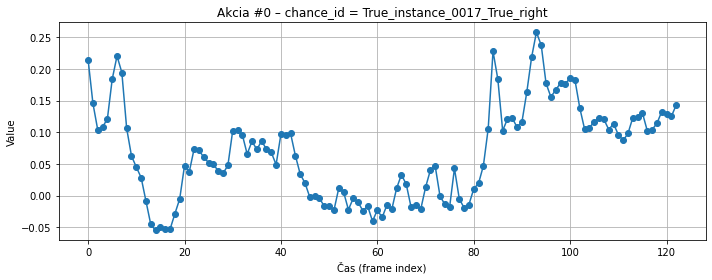

In [5]:
vykresli_akciu_podla_poradia(df, poradie=0) 